### Clustering Project

#### Main objective of the analysis:

In this project, we will implement K-Means algorithm in different size of K.

#### Brief description of the data set:

The data set we use in this project is about the customers who shop in a certain mall. There are 200 samples and 4 attributes:
* Genre of a customer
* Age of a customer
* Annual income of a customer
* Spending score of a customer

In [5]:
# importing the packeges

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# import Dataset

df = pd.read_csv('data/Mall_Customers.csv', index_col='CustomerID')
df

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [8]:
# first 5 sample of the df
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
# <summary information of df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [11]:
# Descrivtive statistics of numeric attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [12]:
# null (NaN) check

df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [13]:
# Duplicated data check 

df.drop_duplicates(inplace=True)

In [14]:
df.shape

(200, 4)

#### K-Means Algorithm:

In [53]:
# We'll use Spending_Score and Annual_Income_(k$)

In [54]:
# Data Visualisation


X_0 = df.iloc[:, [2, 3]].values
X_0

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [55]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_0)
    # inertia_
    wcss.append(kmeans.inertia_)

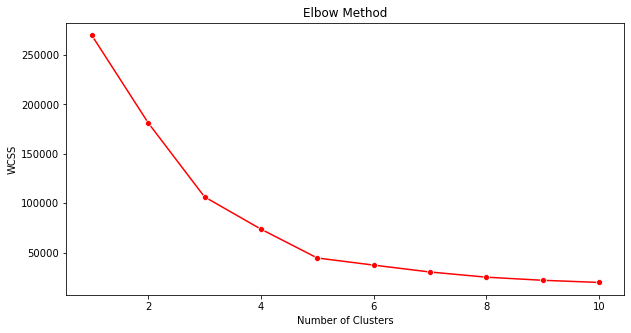

In [56]:
# wcss values to find elbow point

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')

plt.title('Elbow Method')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

According to the figure we find elbow point as K = 5 

In [66]:
K_0 = 5

In [67]:
# K-Means

kmeans = KMeans(n_clusters = K_0, init = 'k-means++', random_state = 42)

# fit and predict 
y_kmeans = kmeans.fit_predict(X_0)

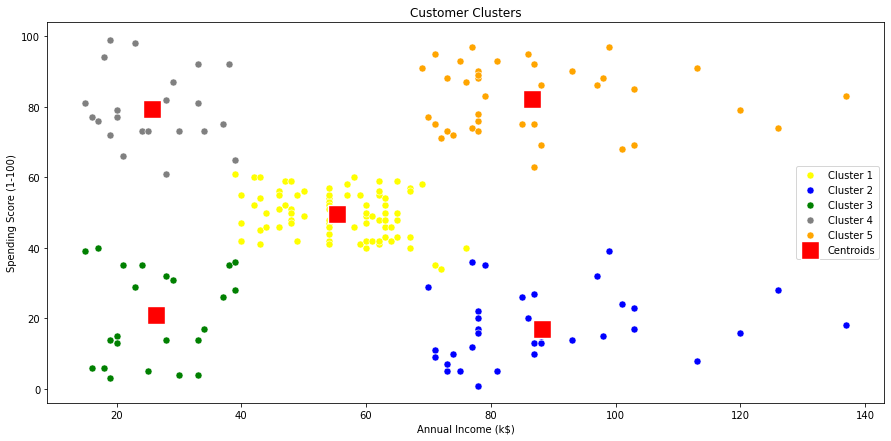

In [59]:
# y_means visualisation

plt.figure(figsize=(15,7))

# K_0 = 5
sns.scatterplot(X_0[y_kmeans == 0, 0], X_0[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_0[y_kmeans == 1, 0], X_0[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X_0[y_kmeans == 2, 0], X_0[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X_0[y_kmeans == 3, 0], X_0[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X_0[y_kmeans == 4, 0], X_0[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                color = 'red', 
                label = 'Centroids',
                s=300,
                marker=',')

plt.grid(False)

plt.title('Customer Clusters')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

Implementing the K-Means Algorithm we found 5 clusters according to annual income and spneding scores.

In [60]:
# We'll use Age and Annual_Income_(k$)

In [61]:
# Data Visualisation


X_1 = df.iloc[:, [1, 3]].values
X_1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [62]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_1)
    # inertia_
    wcss.append(kmeans.inertia_)

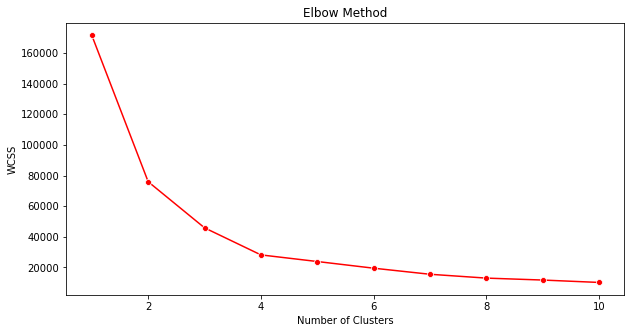

In [63]:
# wcss values to find elbow point

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')

plt.title('Elbow Method')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

According to the figure we find elbow point as K = 5 

In [64]:
K_1 = 4

In [68]:
# K-Means

kmeans = KMeans(n_clusters = K_1, init = 'k-means++', random_state = 42)

# fit and predict 
y_kmeans = kmeans.fit_predict(X_1)

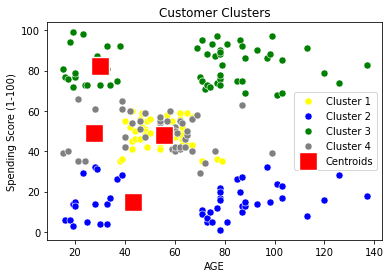

In [69]:
# K_1 = 4
sns.scatterplot(X_0[y_kmeans == 0, 0], X_0[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_0[y_kmeans == 1, 0], X_0[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X_0[y_kmeans == 2, 0], X_0[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X_0[y_kmeans == 3, 0], X_0[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)


sns.scatterplot(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                color = 'red', 
                label = 'Centroids',
                s=300,
                marker=',')

plt.grid(False)

plt.title('Customer Clusters')

plt.xlabel('AGE')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()